In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FuncFormatter

In [2]:
# Import data

walmart = pd.read_csv('train.csv', delimiter=';')
stores = pd.read_csv('stores.csv', delimiter=';')
features = pd.read_csv('features.csv', delimiter=';')
testing = pd.read_csv('test.csv', delimiter=';')

In [3]:
# Concatenate the data in one table

merged = walmart.merge(stores, how='left').merge(features, how='left')
testing_merged = testing.merge(stores, how='left').merge(features, how='left')
#print(merged)

df = pd.DataFrame(data={"Store": merged.Store, "Dept": merged.Dept, "Date": merged.Date, "Weekly_Sales": merged.Weekly_Sales, "IsHoliday": merged.IsHoliday,
                        "Type": merged.Type, "Size": merged.Size, "Temperatur": merged.Temperature, "Fuel_Price": merged.Fuel_Price,
                        "MarkDown1": merged.MarkDown1, "MarkDown2": merged.MarkDown2, "MarkDown3": merged.MarkDown3, "MarkDown4": merged.MarkDown4,
                        "MarkDown5": merged.MarkDown5, "CPI": merged.CPI, "Unemployment": merged.Unemployment})
df.to_csv("merged.csv", sep=',',index=False)

merged2 = pd.DataFrame(df.groupby(['Store', 'Date']).Weekly_Sales.sum())
merged2.to_csv("merged2.csv",sep=',', index=True)
df_Weekly_Sales = pd.read_csv("merged2.csv", delimiter=',')

df_Weekly_Sales['Date'] = pd.to_datetime(df_Weekly_Sales.Date, format="%d.%m.%Y")




In [4]:
def parser(s):
    return datetime.datetime.strptime(s, "%d.%m.%Y")

def parser2(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d")

In [12]:
df_features = pd.read_csv("features.csv", delimiter=';', parse_dates = [1], squeeze=True, date_parser=parser)
df_stores = pd.read_csv("stores.csv", delimiter=',')

'\n#df_store1 = df_features[df_features["Store"] == 1]\n\nplt.figure(figsize=(20,8))\nplt.plot(df_features.Date, df_features.Fuel_Price)\n#plt.plot(df_store1.Date, df_store1.Fuel_Price)\nplt.title("Pommes", fontsize=16)\nplt.ylabel("Fuel Price", fontsize=16)\n'

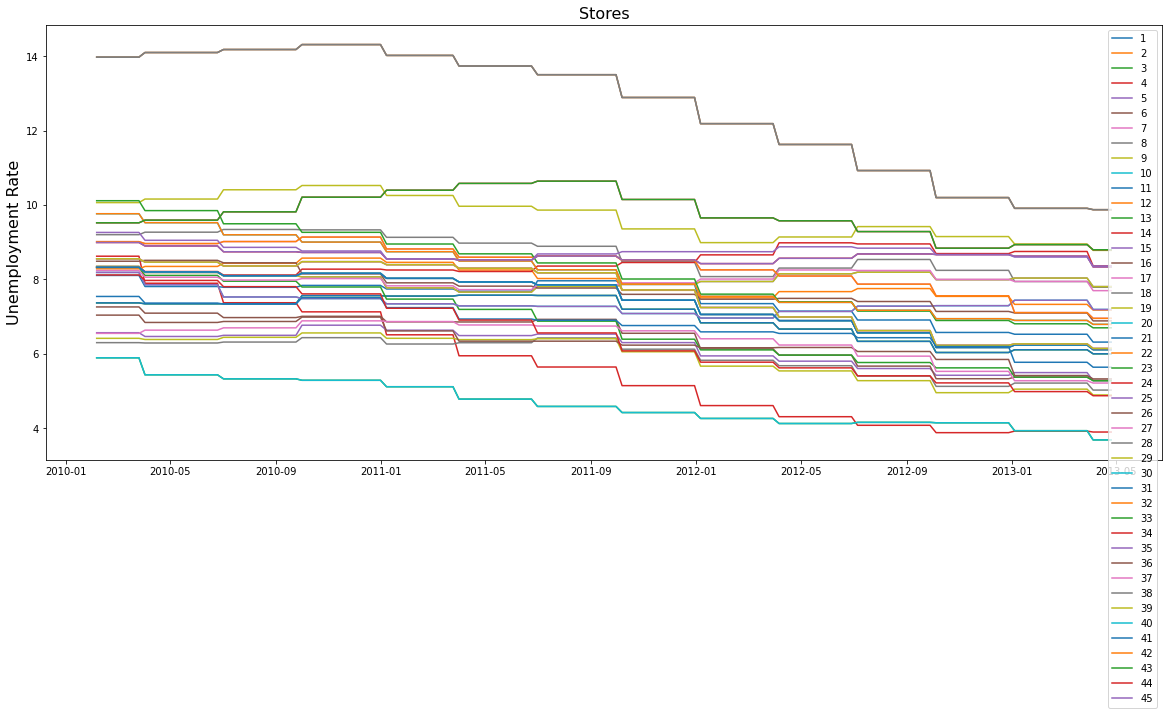

In [6]:
# Creates a plot showing the same feature of every store

plt.figure(figsize=(20,8))
plt.title("Stores", fontsize=16)
plt.ylabel("Unemployment Rate", fontsize=16)

for i in range(1,46):
    df_store1 = df_features[df_features["Store"] == i]

    plt.plot(df_store1.Date, df_store1.Unemployment, label=i)
    
plt.legend(loc='best')

<ipython-input-11-303fe5140e66>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specificStore.sort_values(by=['Date'], inplace=True, ascending=True)
<ipython-input-11-303fe5140e66>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specificStore.sort_values(by=['Date'], inplace=True, ascending=True)
<ipython-input-11-303fe5140e66>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specificStore.sort_values(by=['Date'], inplace=True, as

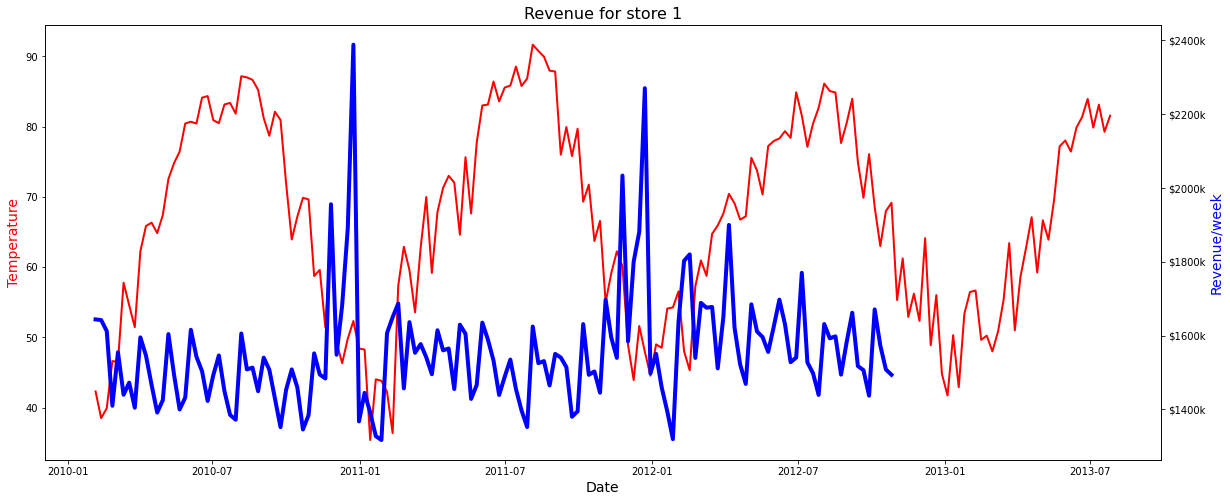

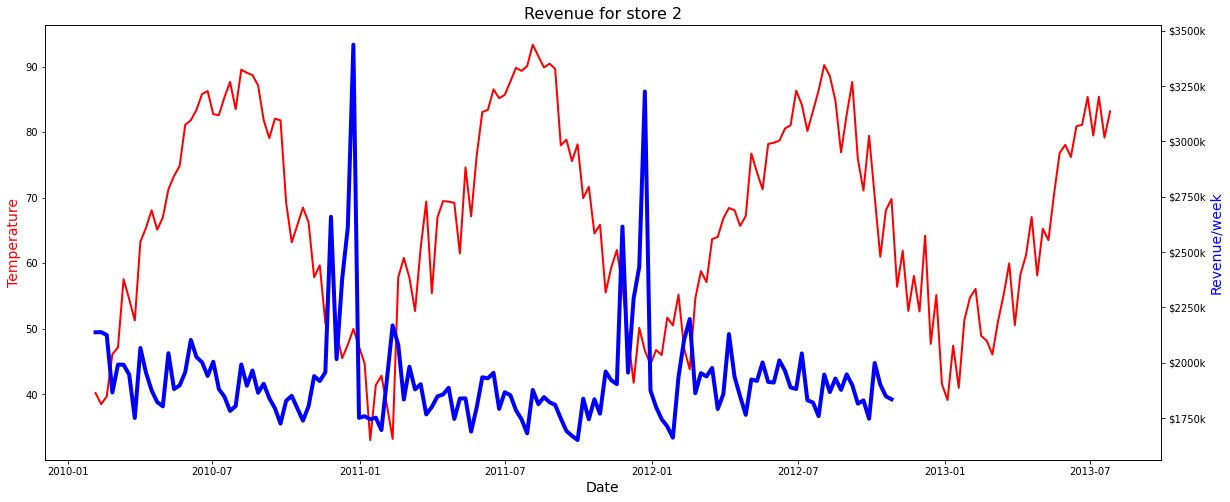

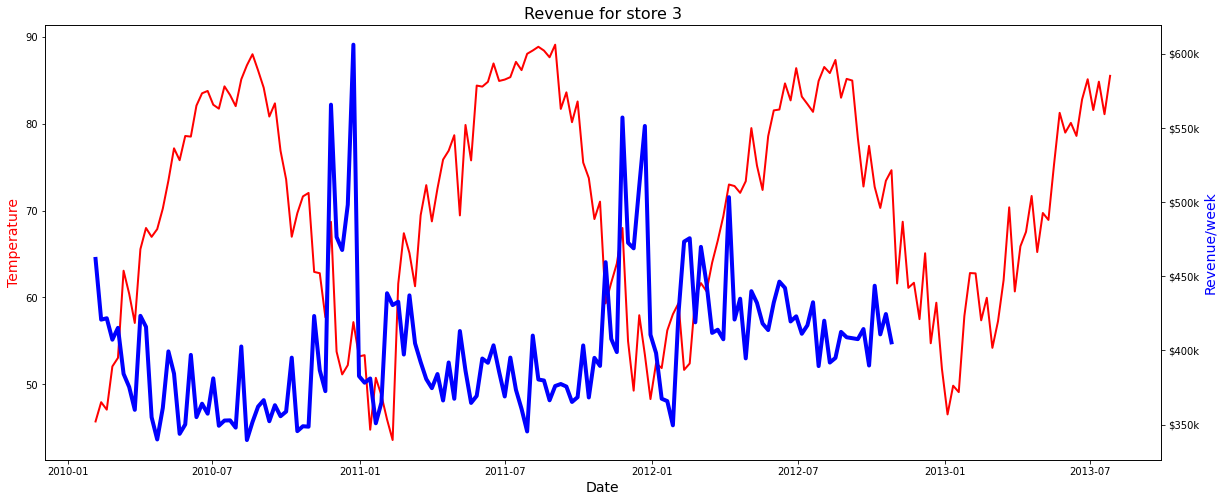

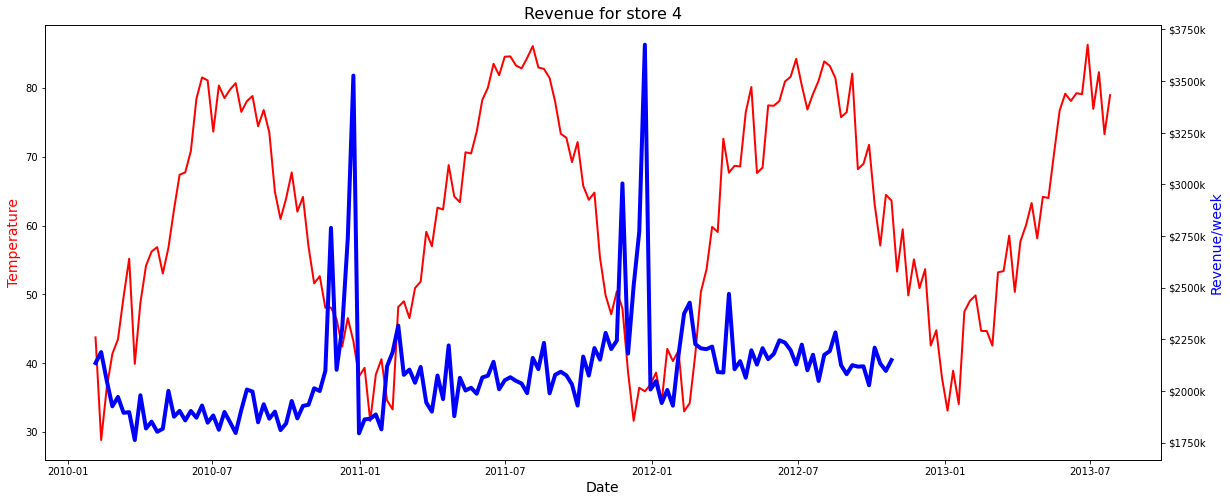

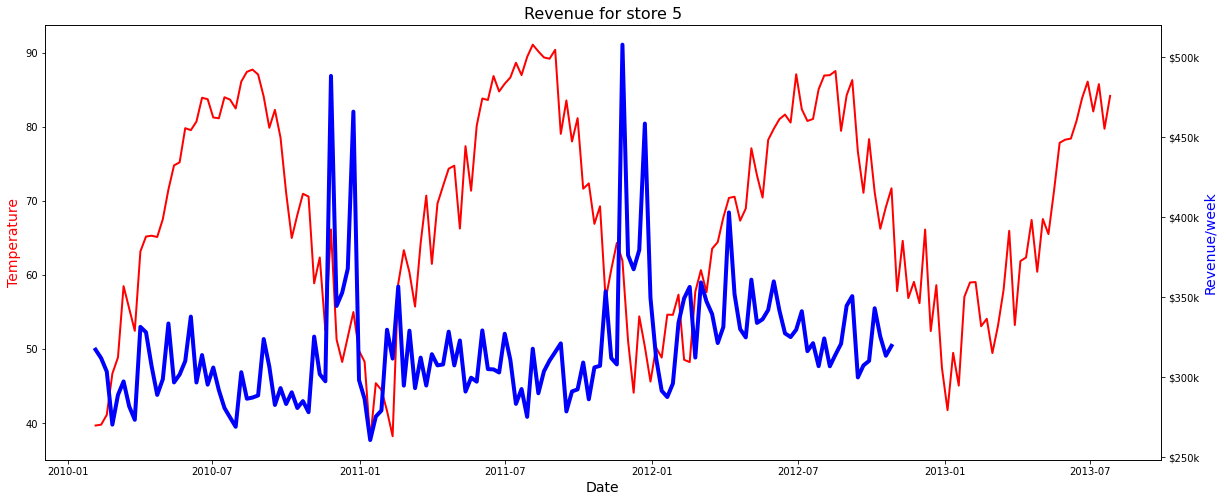

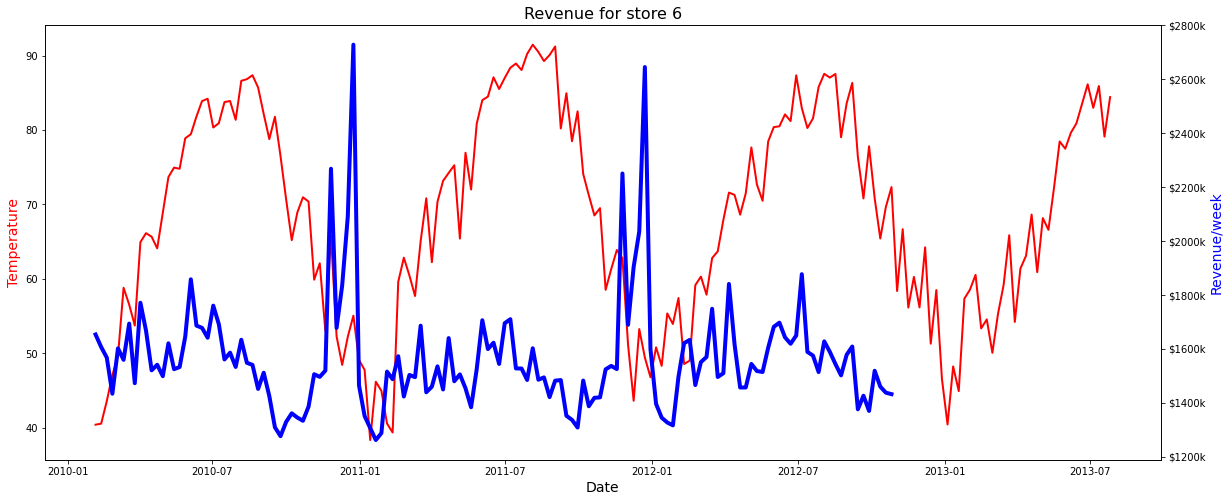

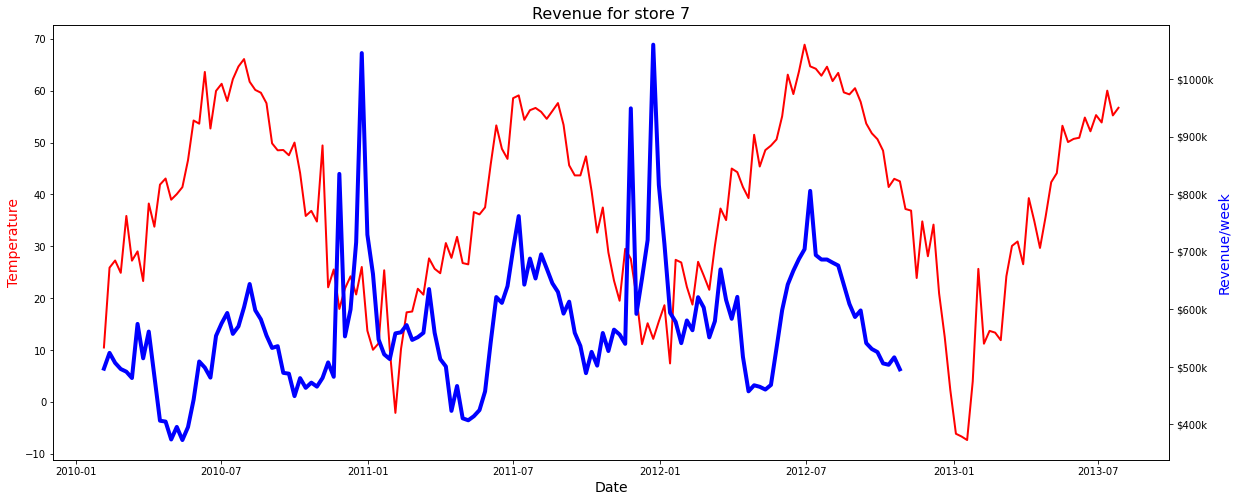

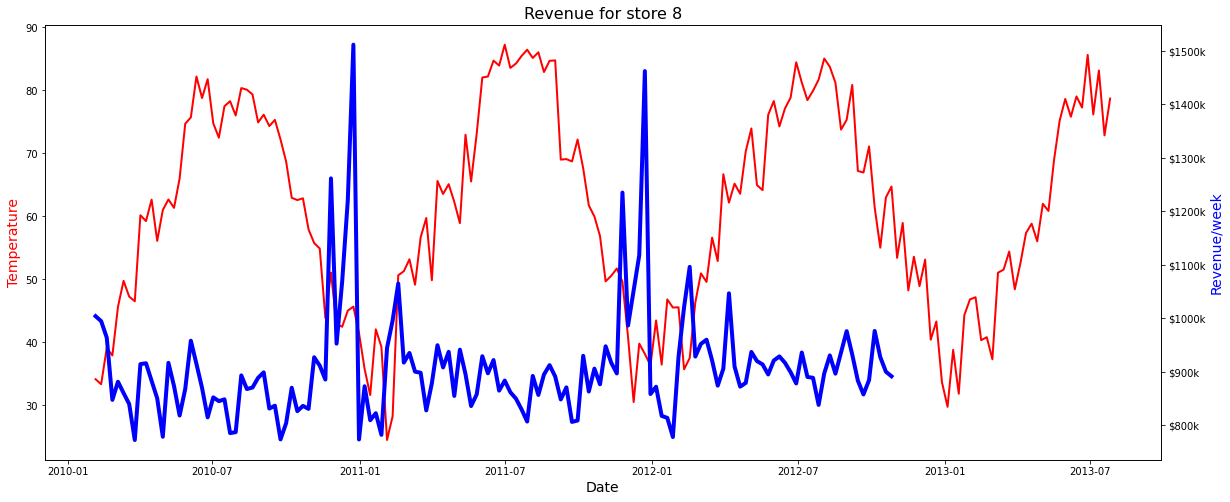

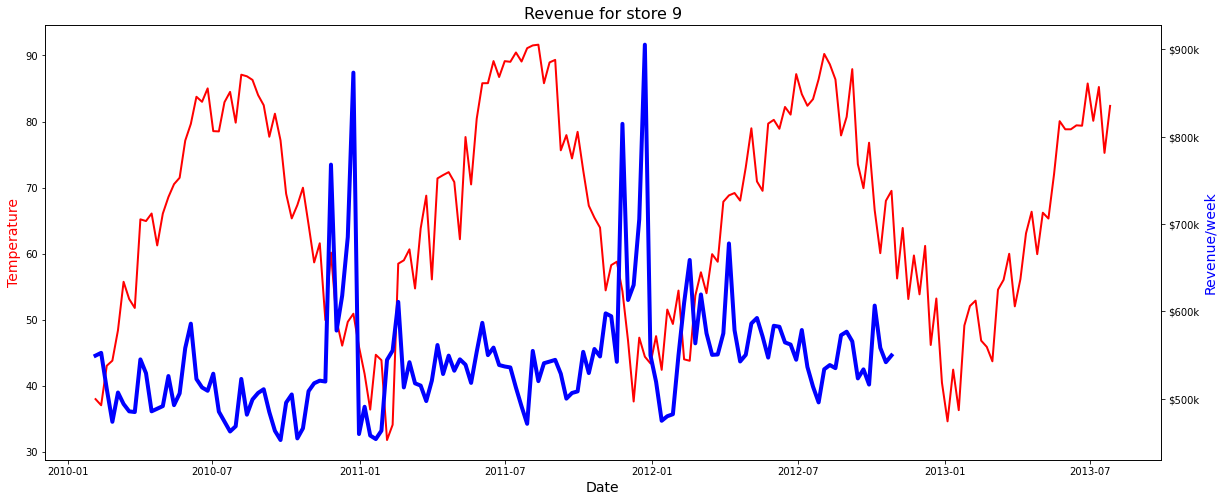

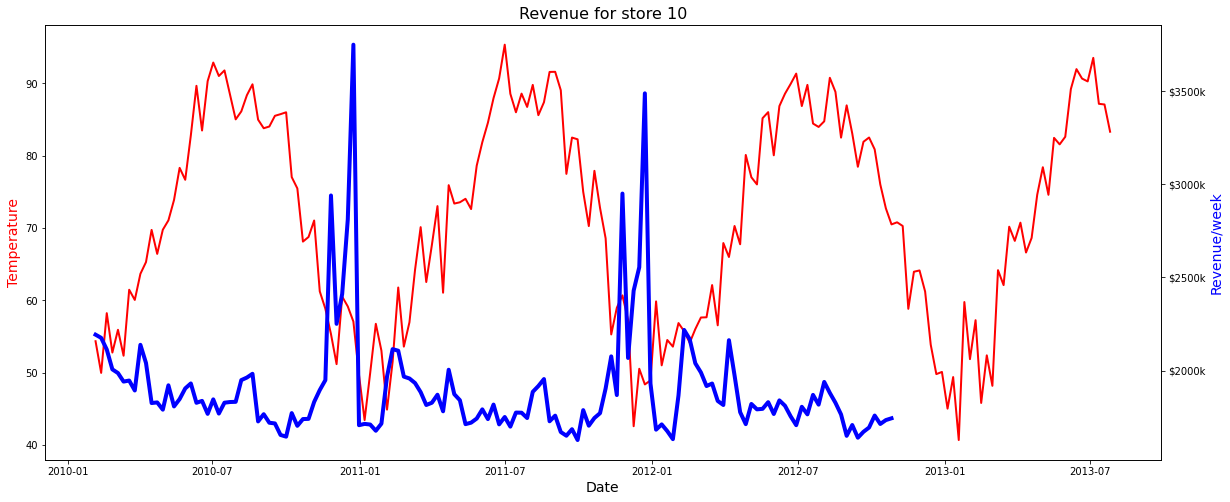

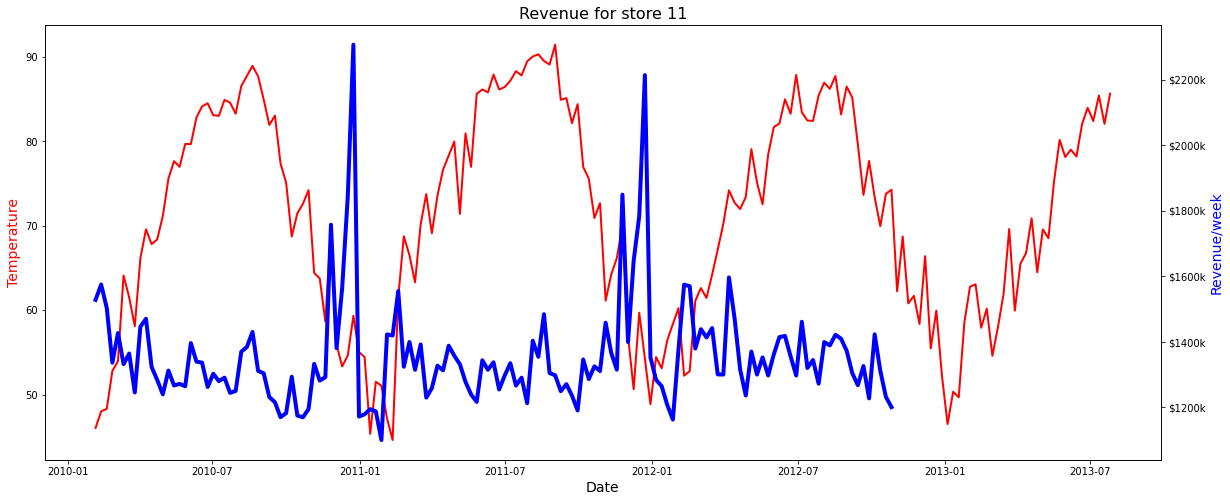

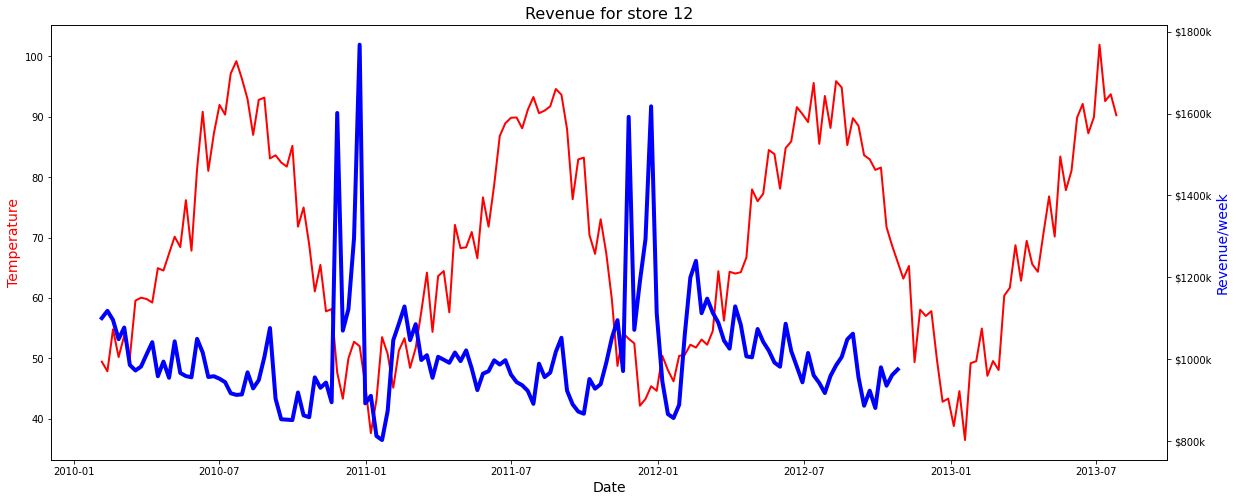

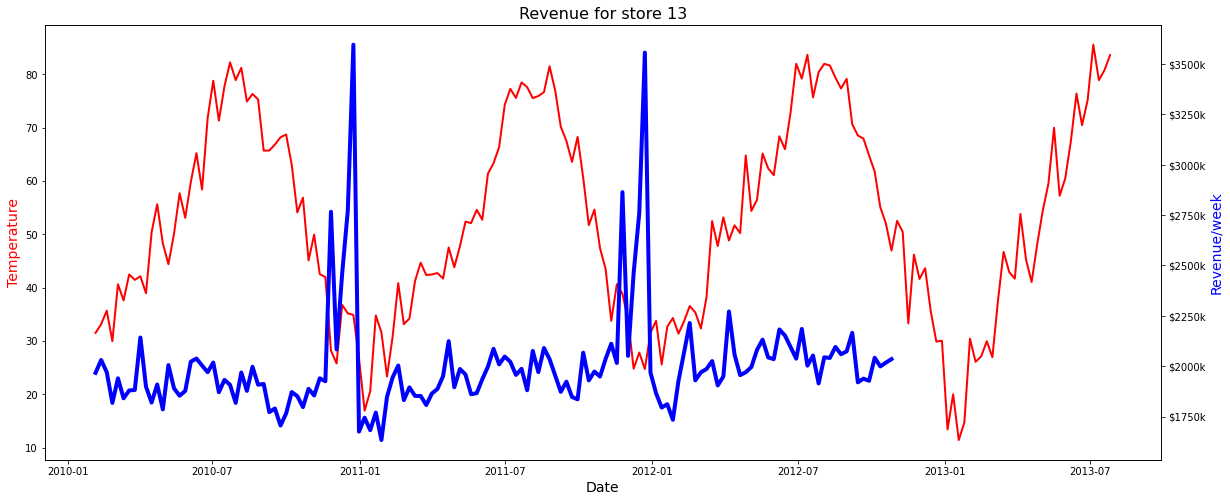

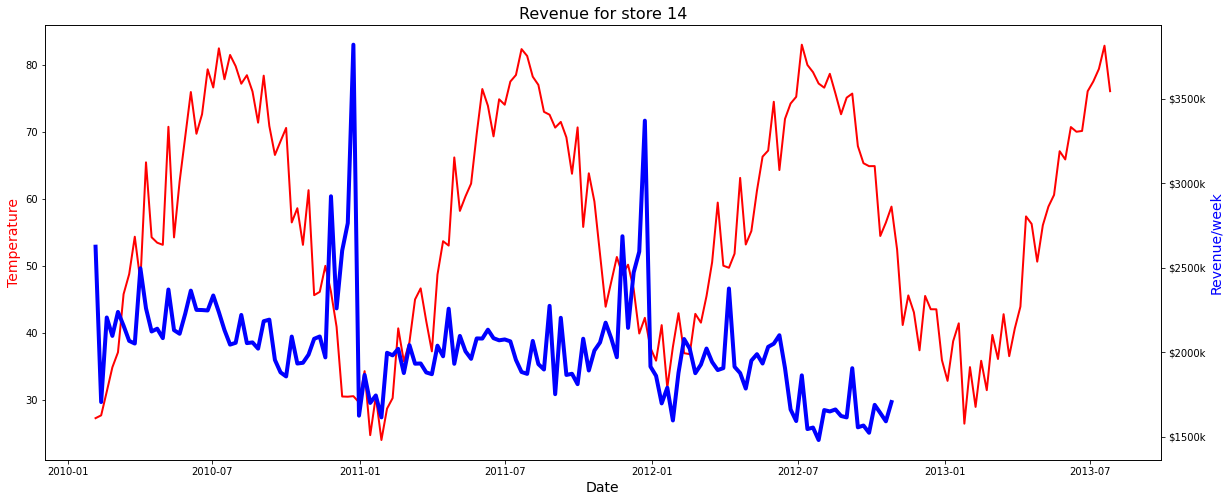

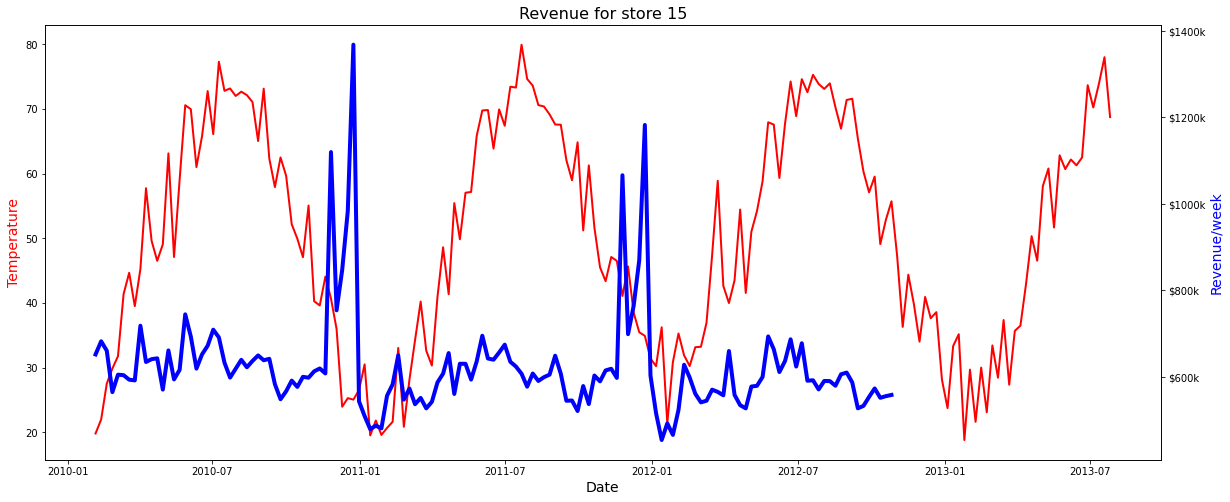

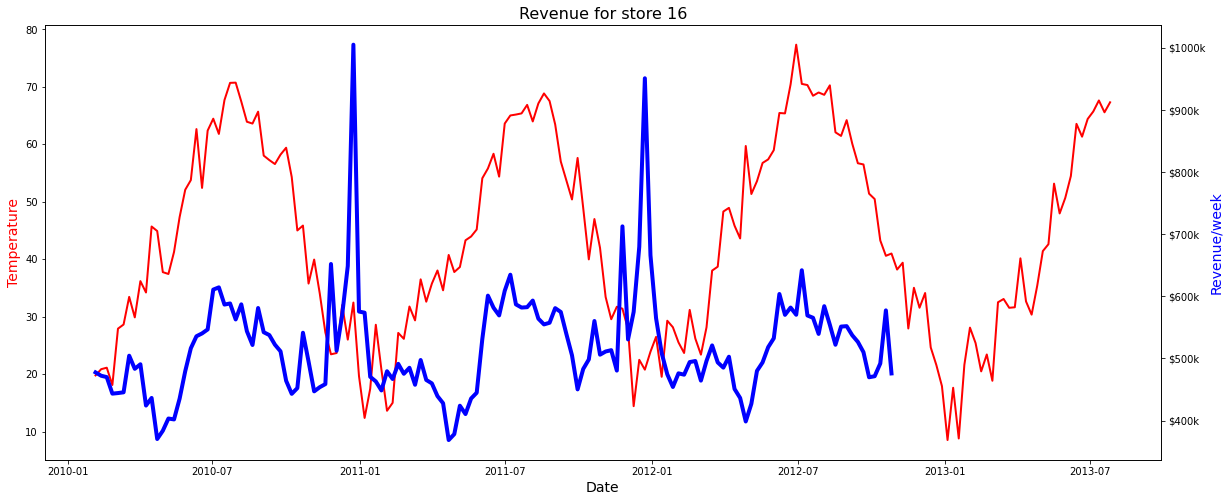

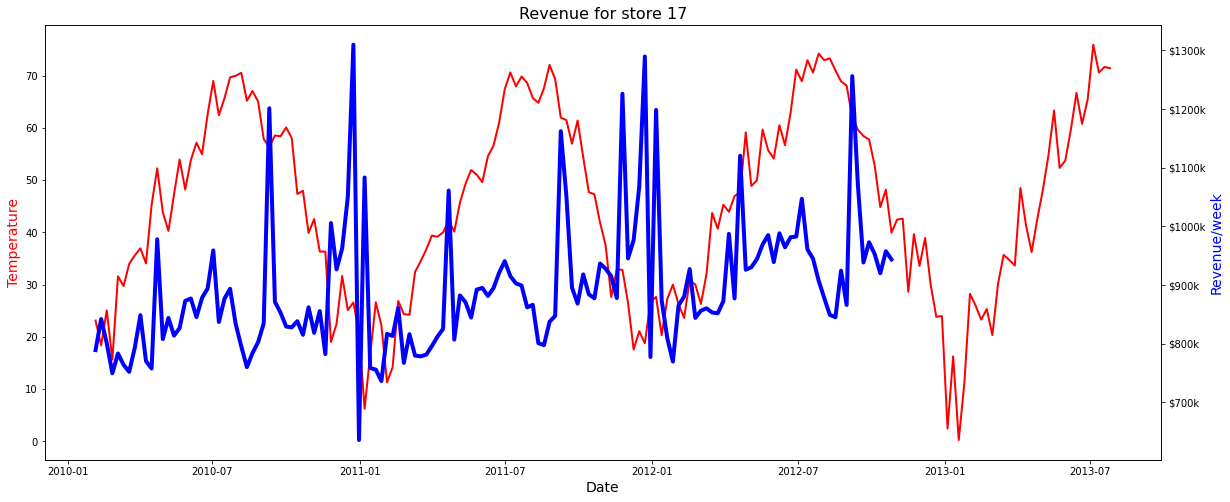

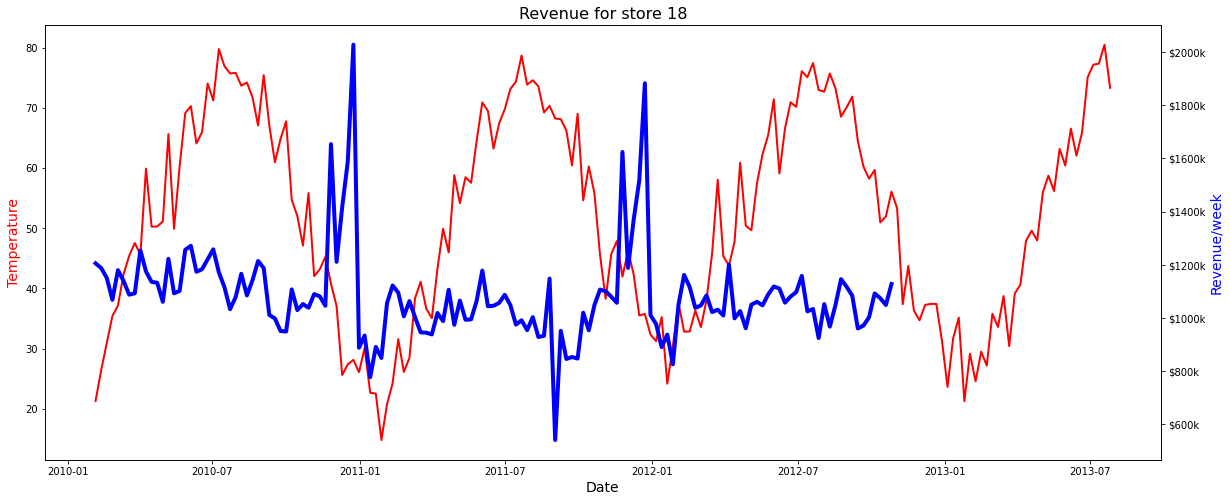

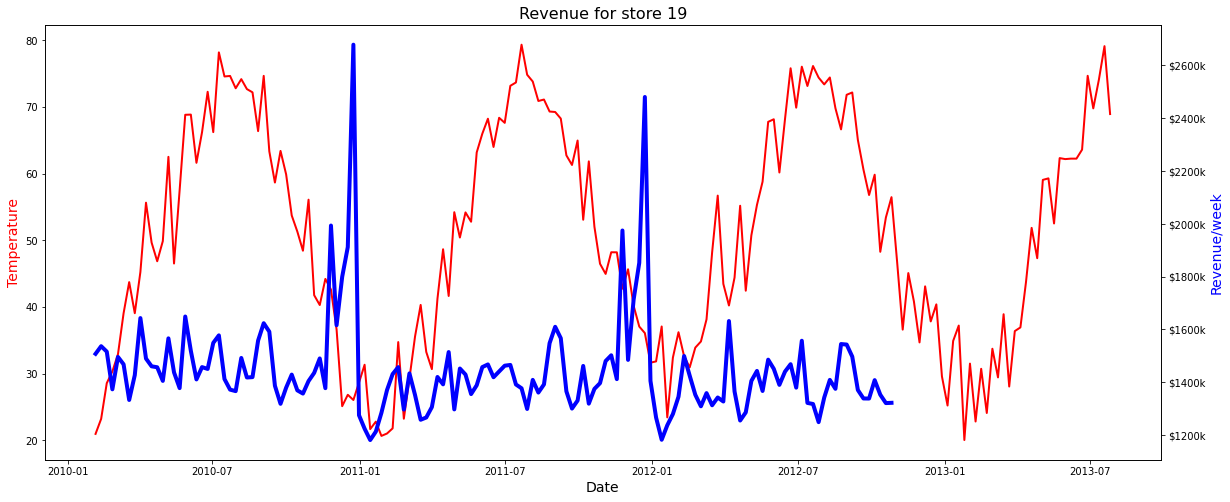

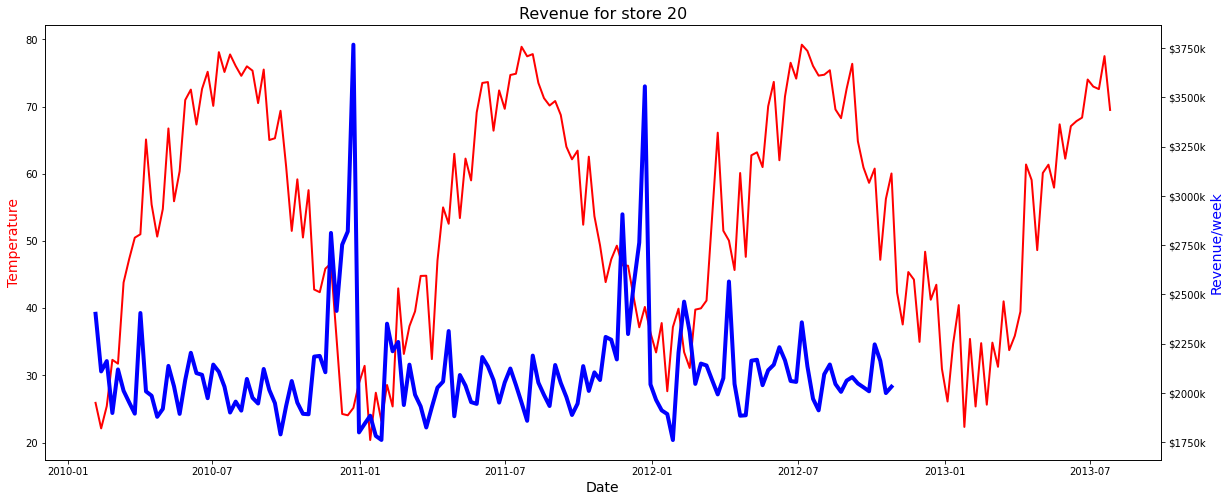

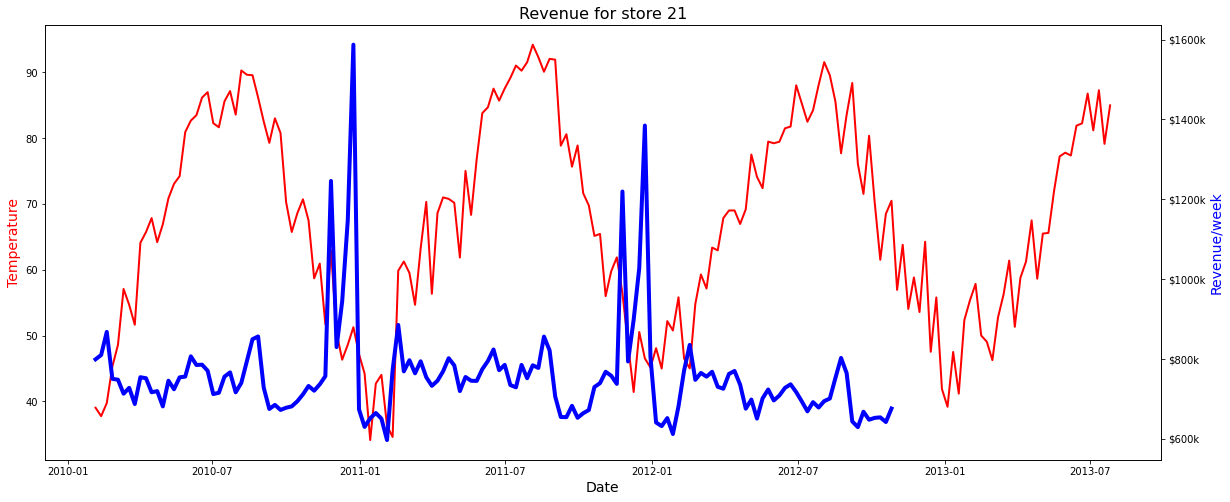

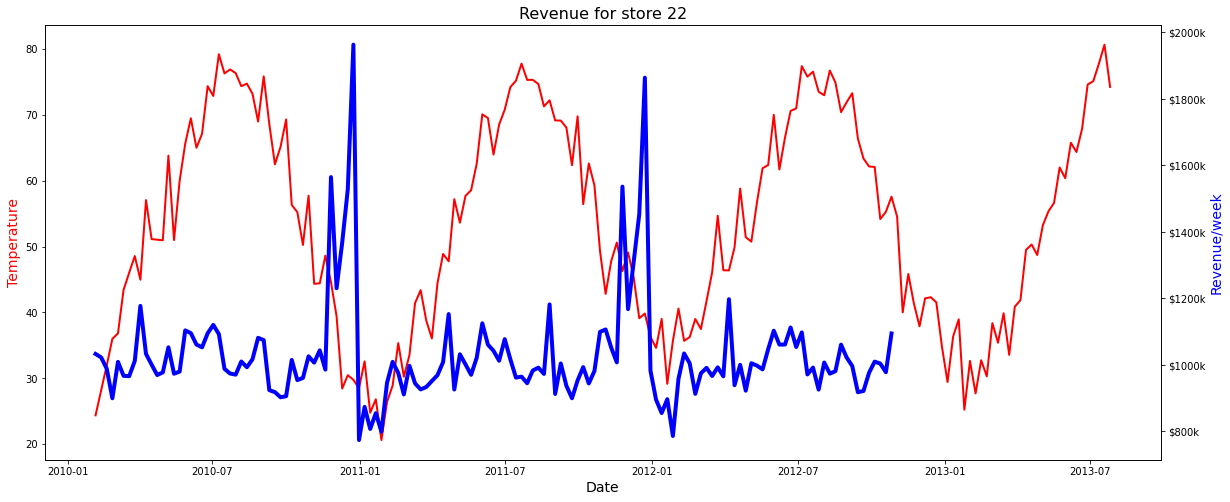

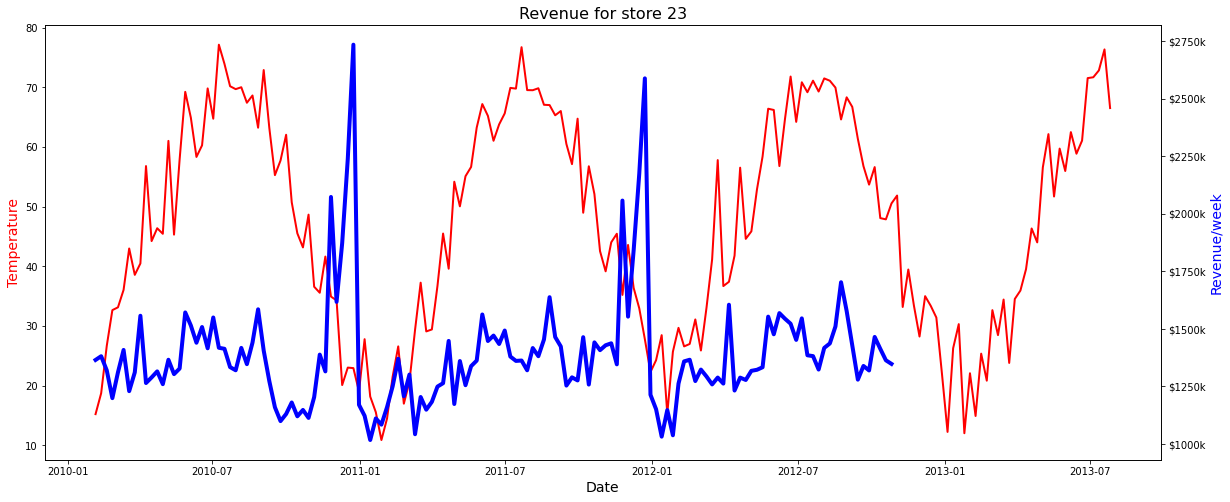

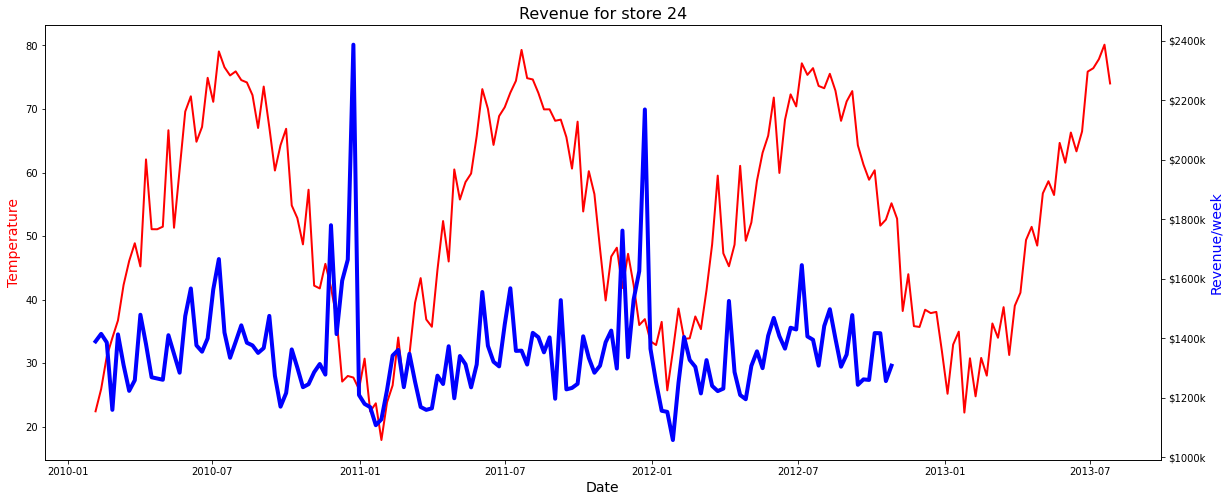

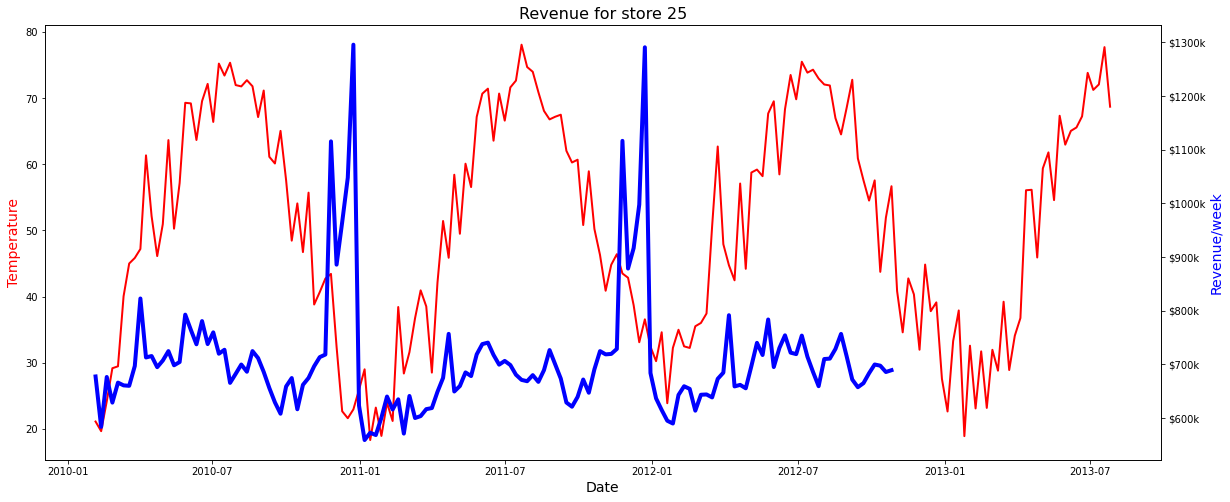

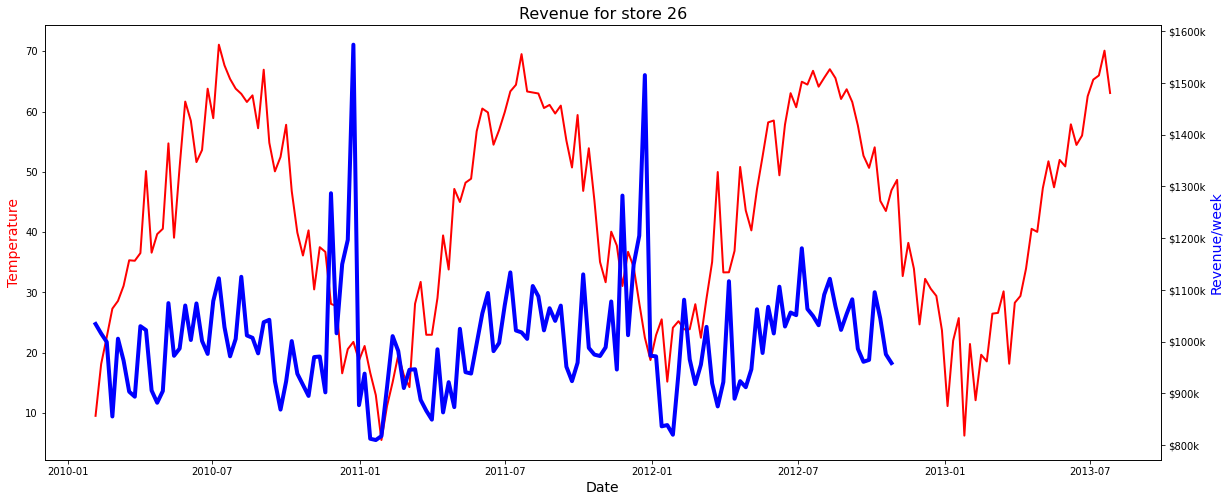

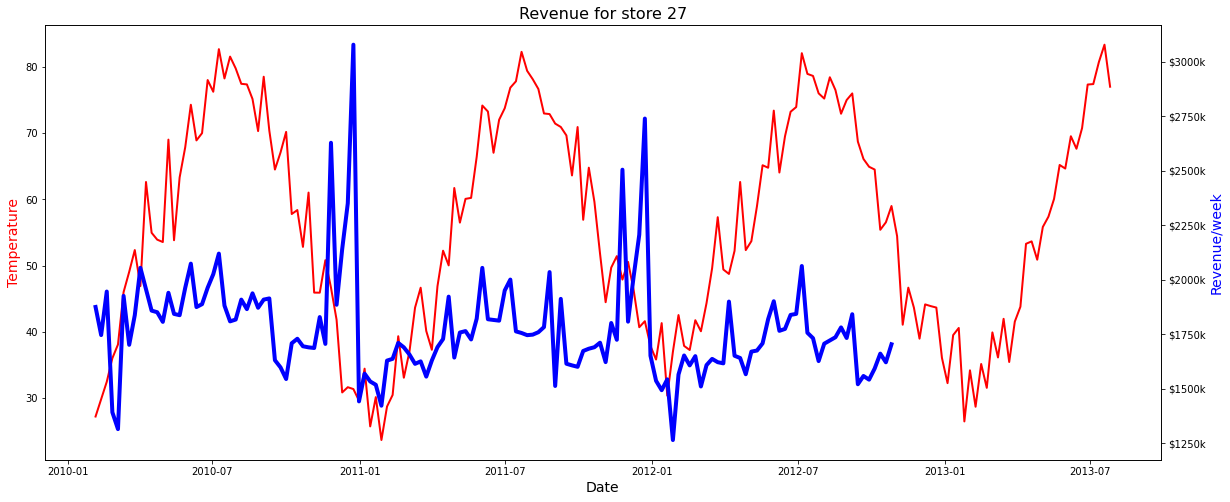

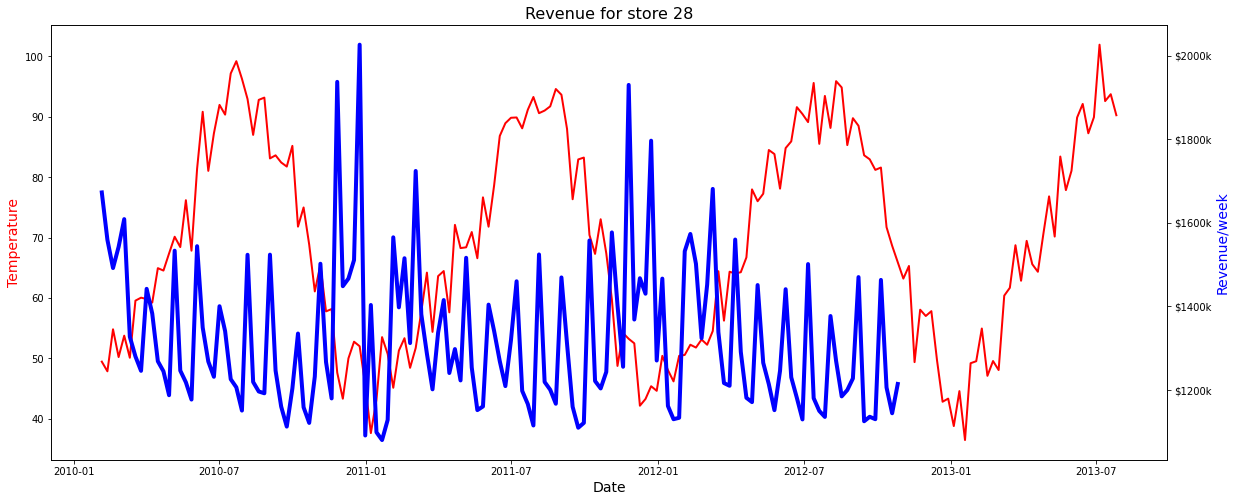

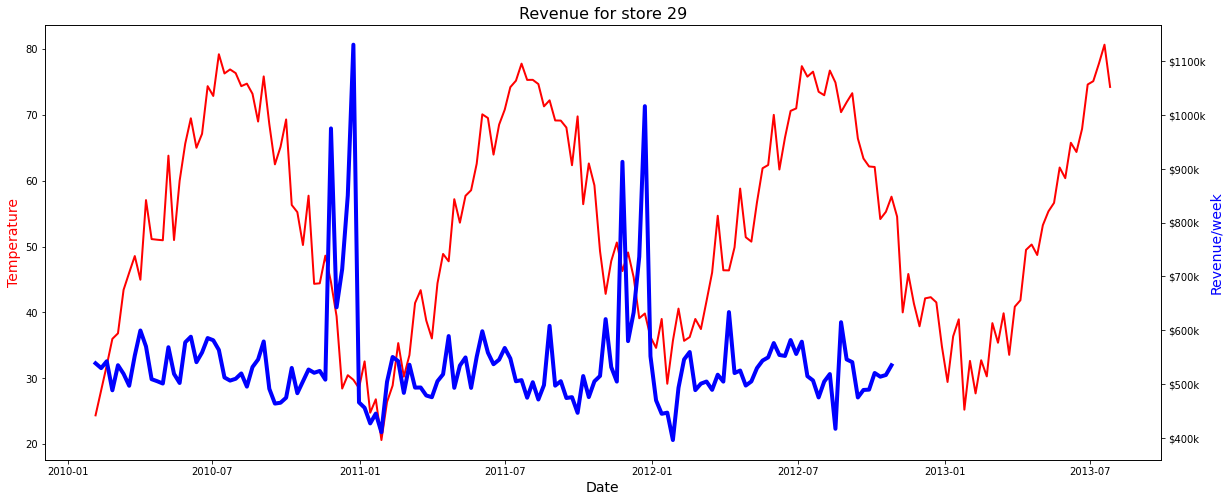

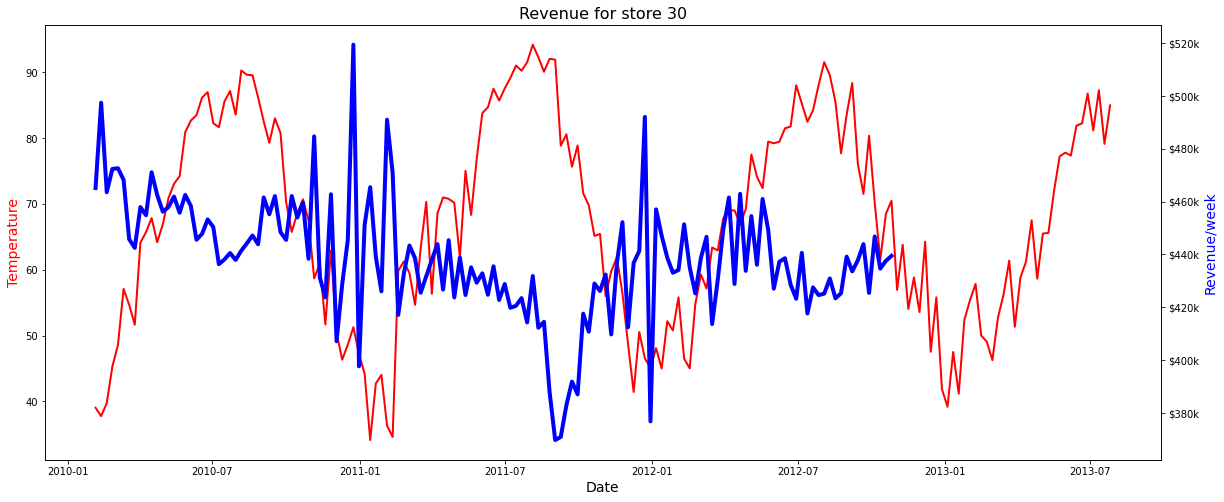

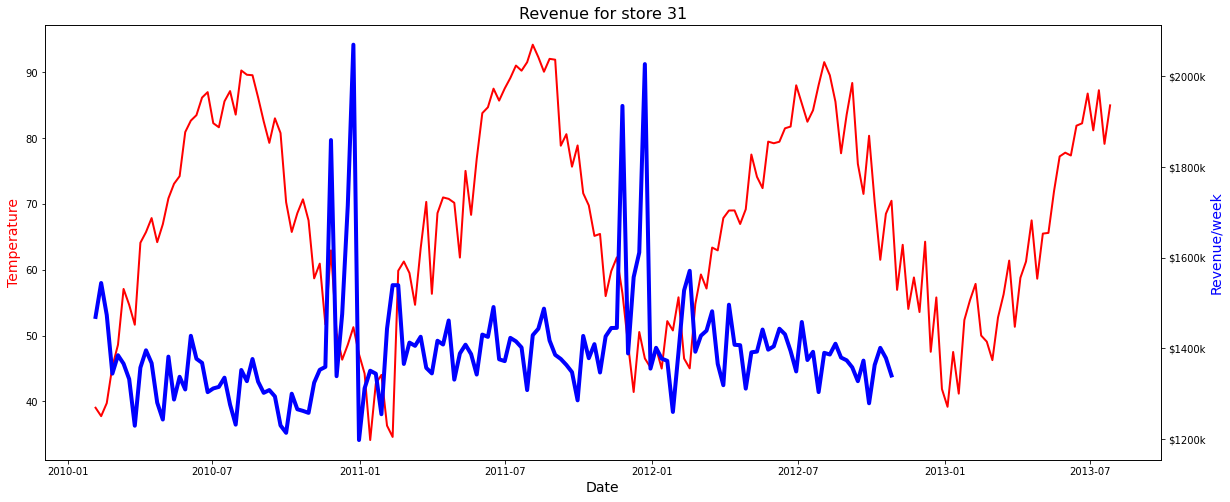

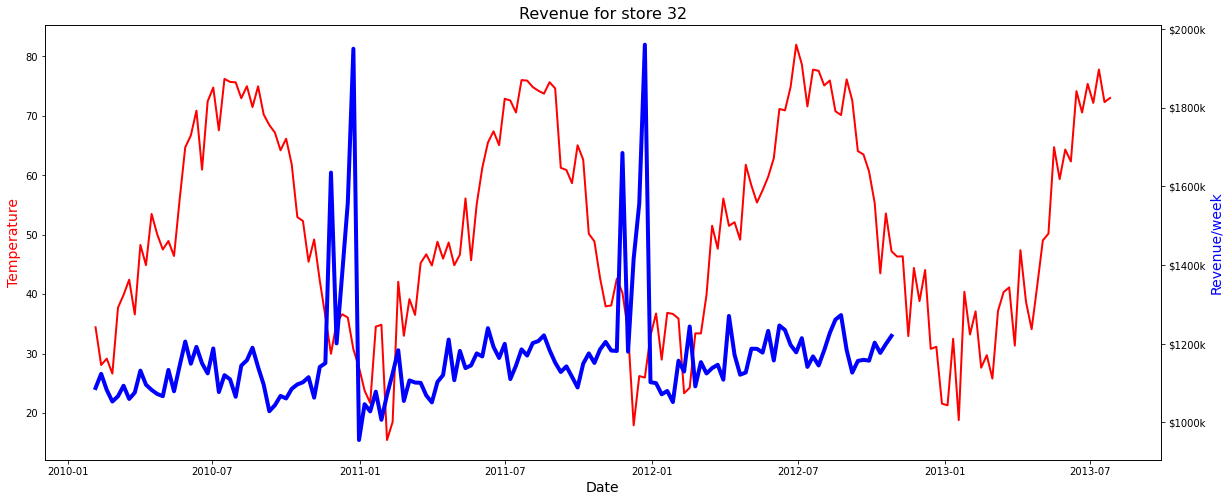

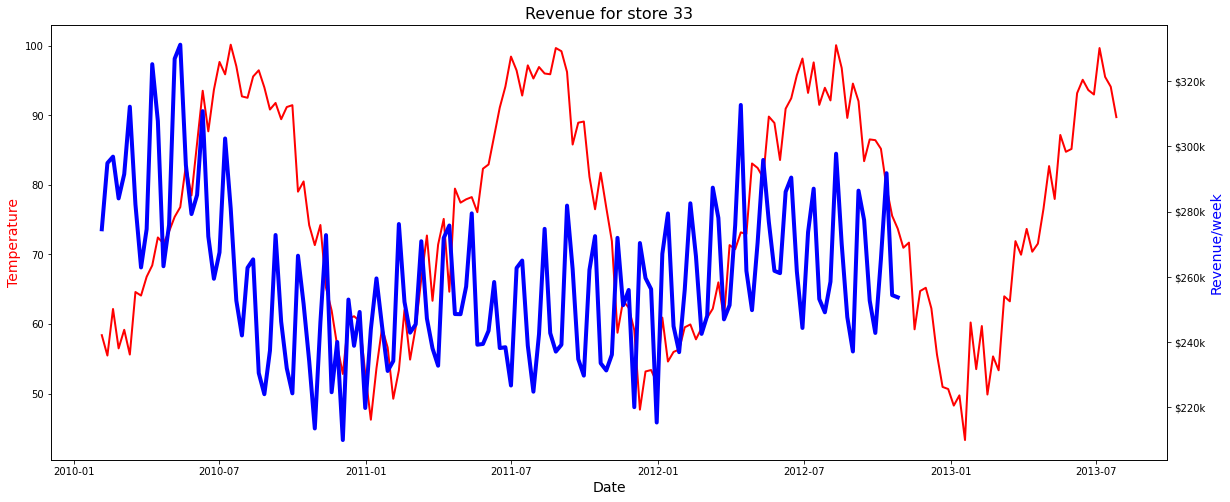

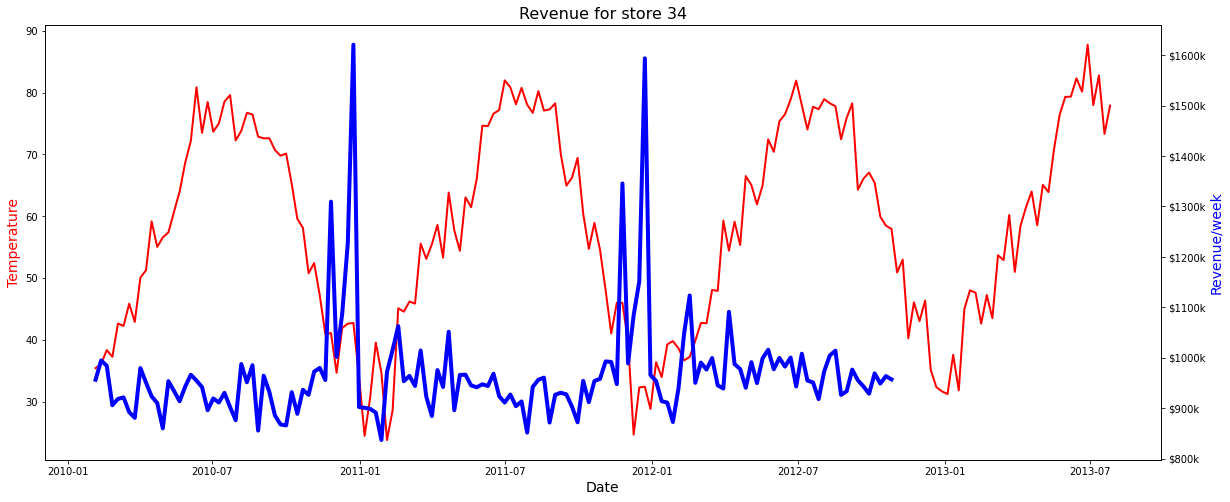

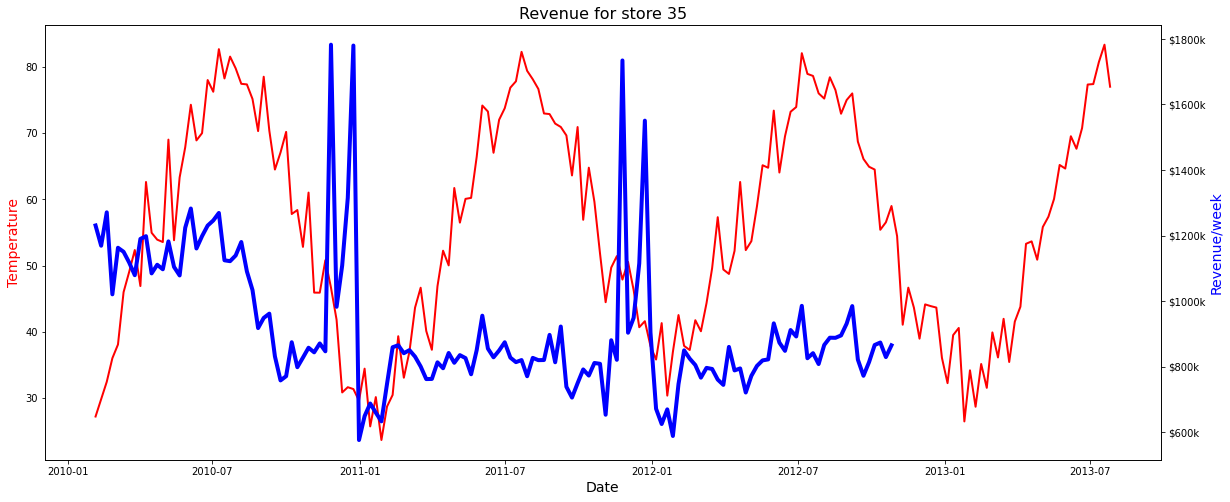

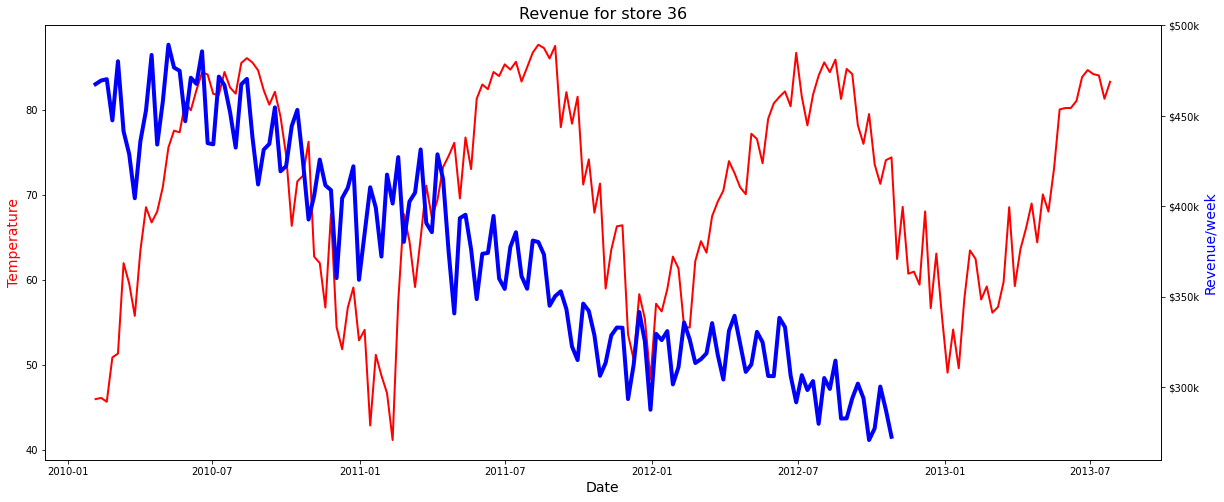

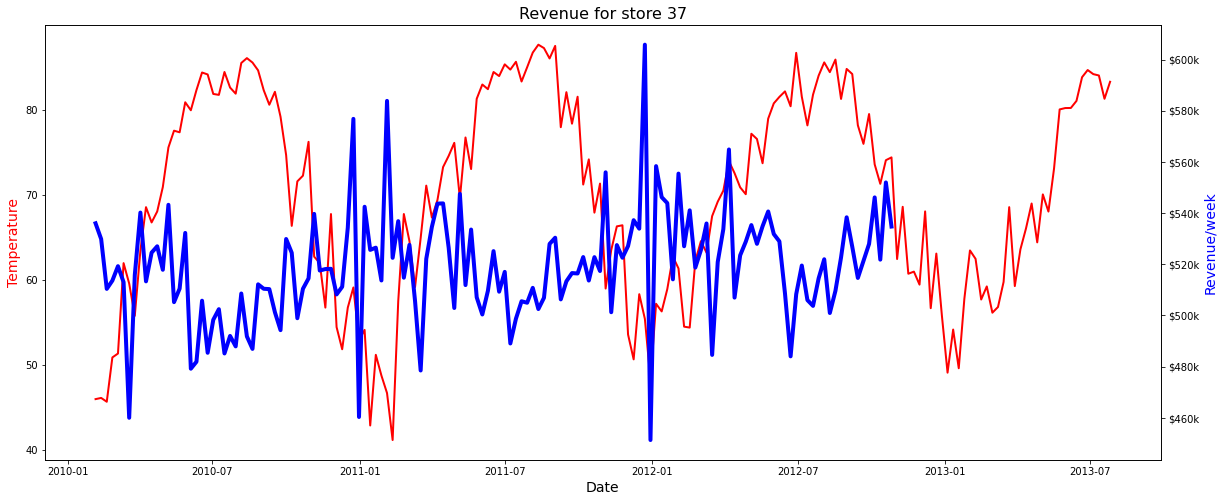

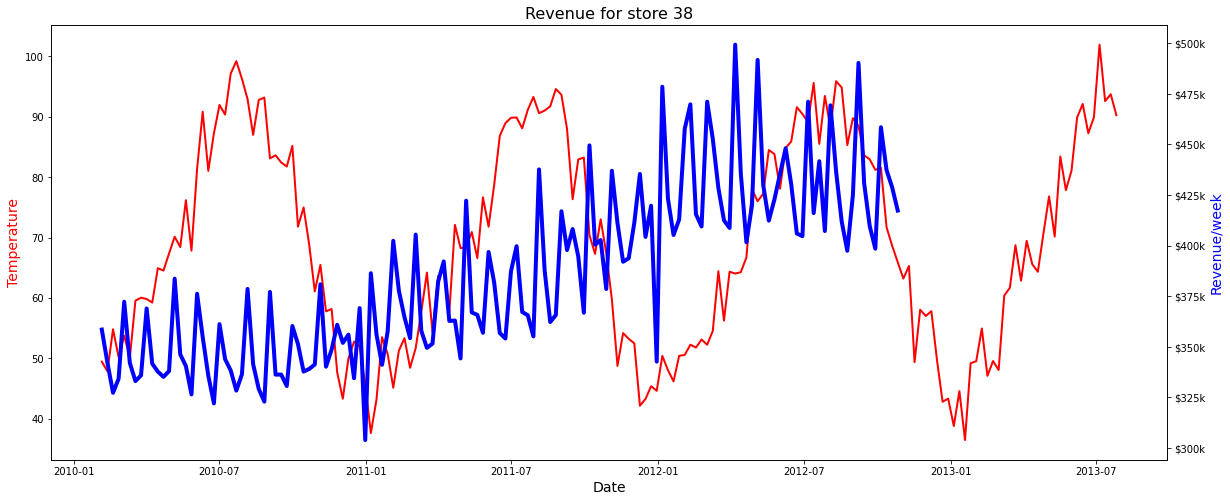

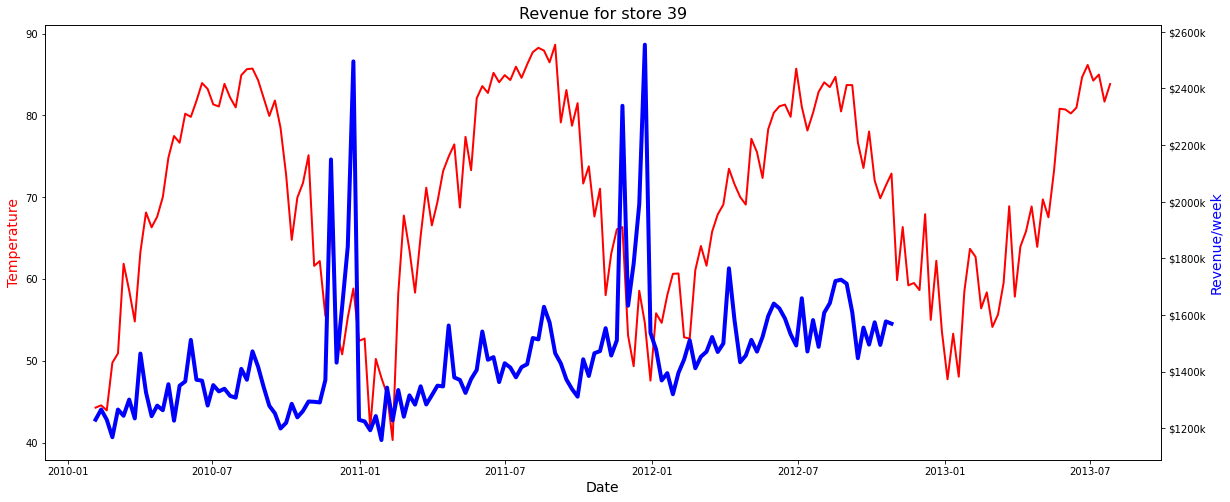

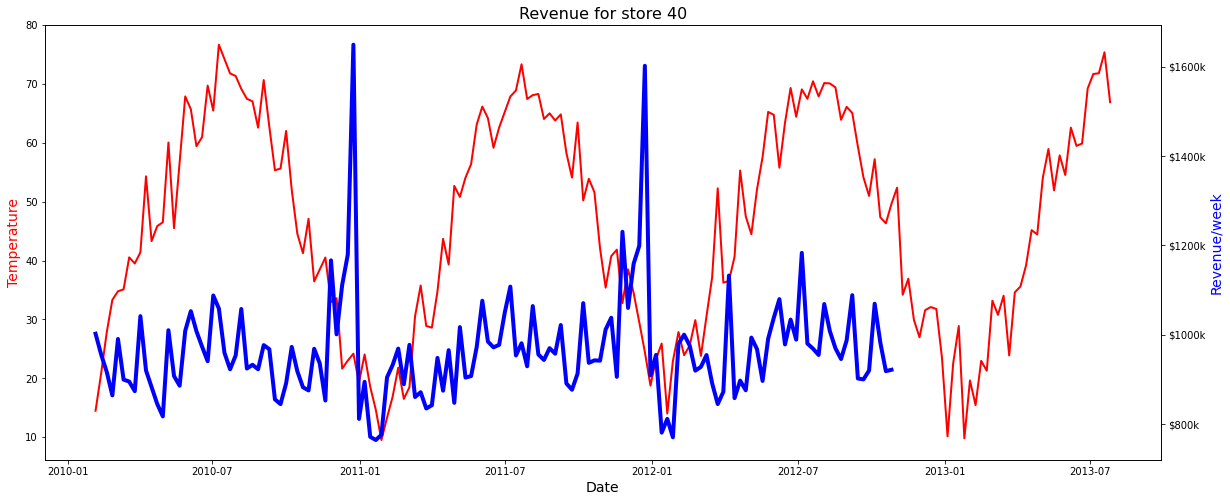

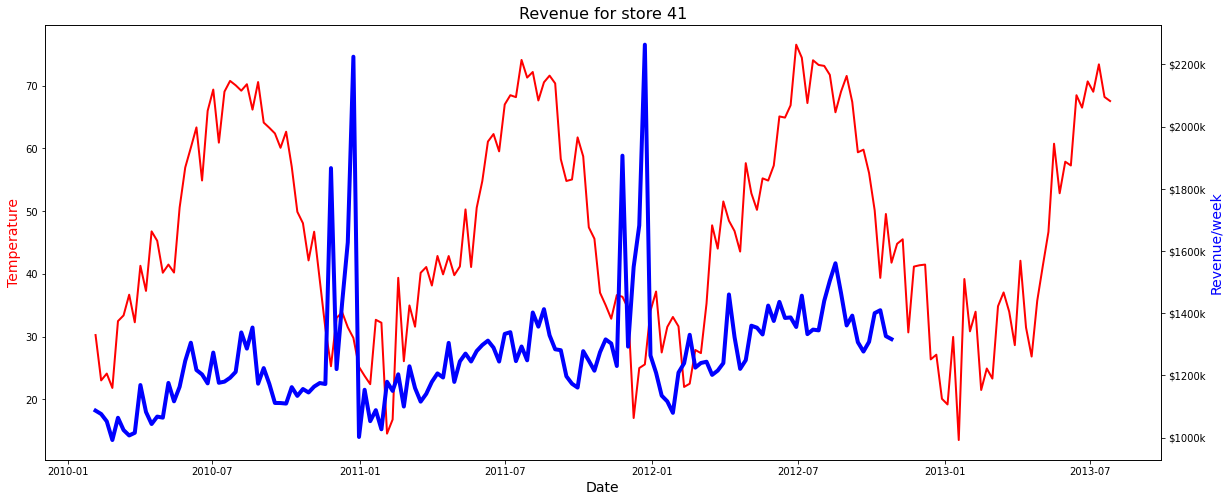

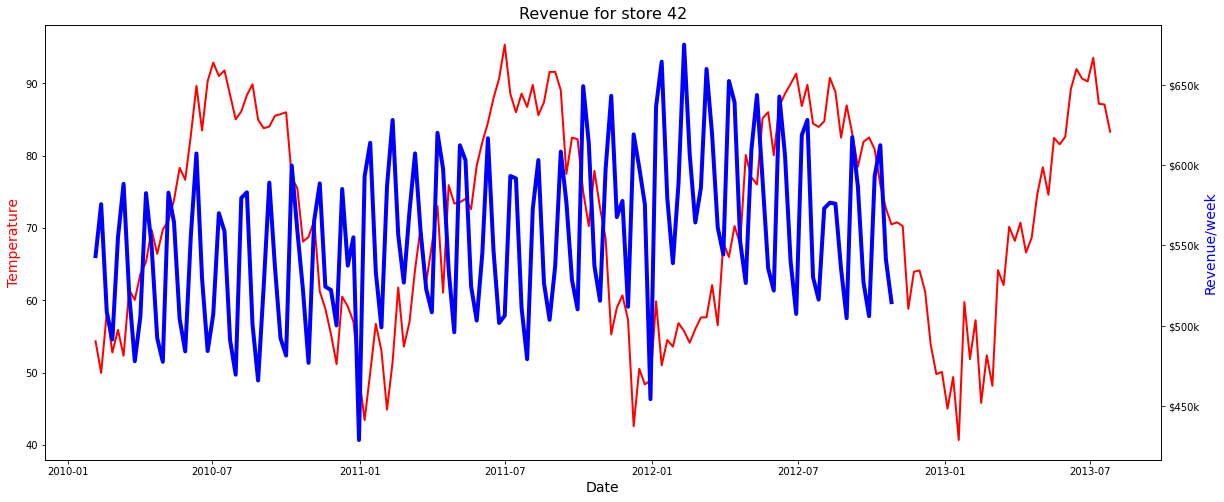

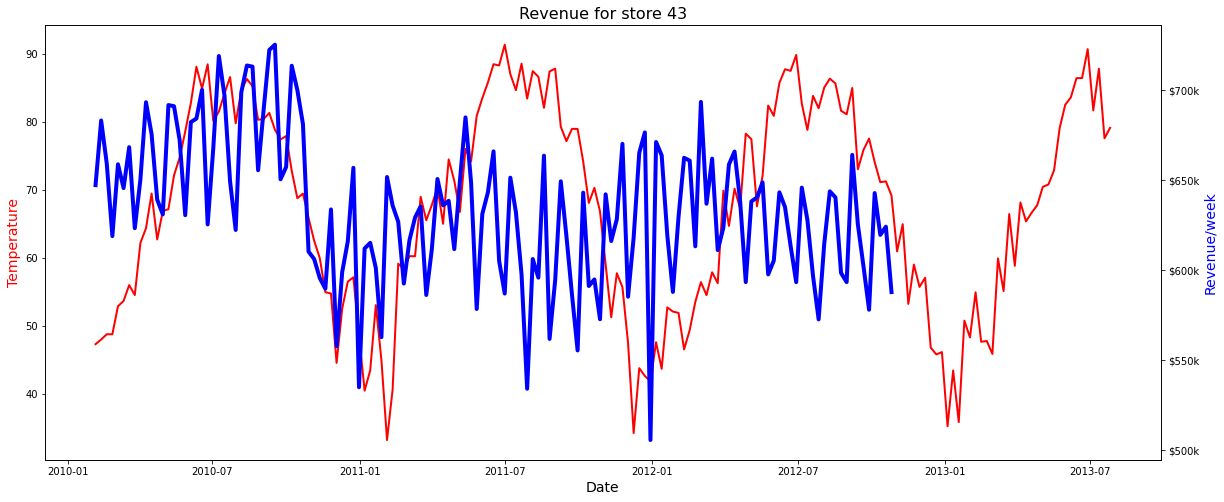

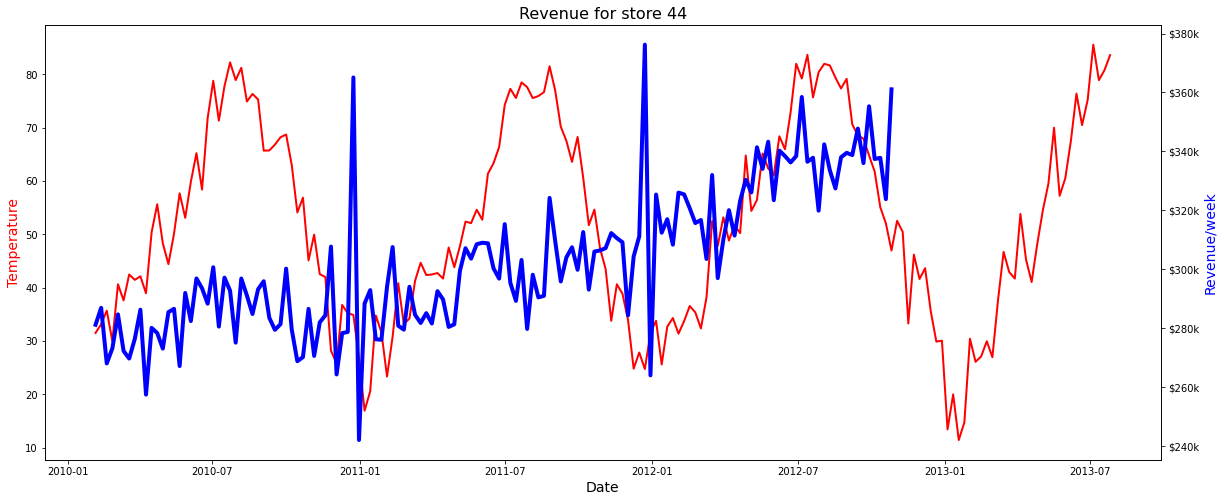

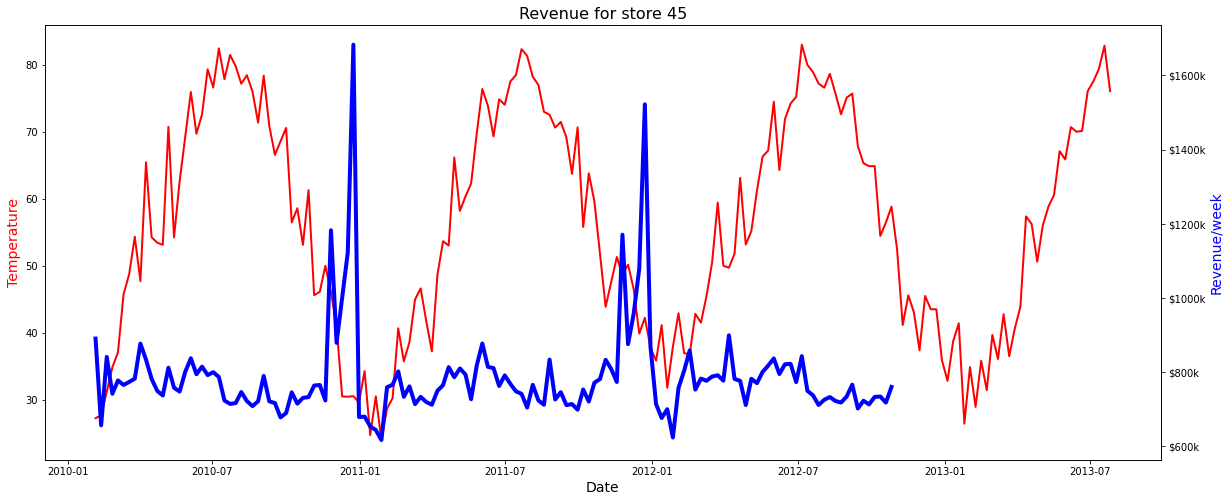

In [11]:
# Creates a plot for every store which shows visually the correlation of a feature and the revenue

for i in range(1,46):
    fig,ax = plt.subplots()
    fig.set_size_inches(20, 8)
    # twin object for two different y-axis on the same plot
    ax2=ax.twinx()
    df_features_specificStore = df_features[df_features["Store"] == i]

    specificStore = df_Weekly_Sales[df_Weekly_Sales['Store'] == i]
    specificStore.sort_values(by=['Date'], inplace=True, ascending=True)


    def thousands(x, pos):   
        return '$%1.0fk' % (x*1e-3)

    formatter = FuncFormatter(thousands)
    
    ax2.plot(specificStore.Date, specificStore.Weekly_Sales, label = "Revenue", color ="blue", lw=4)
    ax2.yaxis.set_major_formatter(formatter) 
    ax.set_xlabel("Date",fontsize=14)
    ax2.set_ylabel("Revenue/week",color="blue",fontsize=14)

    # Create a plot with different y-axis using second axis object
    ##################################################### insert here:    XXX      ##################
    ax.plot(df_features_specificStore.Date, df_features_specificStore.Temperature, color="red", lw=2)
    ax.set_ylabel("Temperature",color="red",fontsize=14)
    plt.title("Revenue for store {}".format(i), fontsize=16)
